 # KNN CLASSIFICATION assignment

In [20]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [21]:
zoo_data = pd.read_csv(r"C:\Users\91863\Downloads\Zoo.csv")
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [22]:
zoo_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [23]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [24]:
zoo_data.shape

(101, 18)

In [25]:

x = zoo_data.iloc[:,1:17]
y = zoo_data.iloc[:,17]

In [26]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [28]:
# Normalisation function
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x = scaler.fit_transform(x)

In [37]:
x[3,:]

array([ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
       -0.74420841,  0.89642146,  0.80977633,  0.46569032,  0.51234754,
       -0.29329423, -0.44986771,  0.57253971, -1.69841555, -0.38435306,
        1.13818037])

#  grid search algorithm tuning for finding k-value

In [29]:

import warnings
warnings.filterwarnings("ignore")

In [30]:
# grid search fo algorithm tuning to get k- value with high accuracy

from sklearn.model_selection import GridSearchCV


In [31]:
n_neighbors = np.array(range(1,31))
param_grid = dict(n_neighbors = n_neighbors)

In [38]:
model = KNeighborsClassifier()
grid= GridSearchCV(estimator = model,param_grid = param_grid,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [39]:
grid.best_score_

0.9504761904761905

In [40]:
grid.best_params_

{'n_neighbors': 1}

# KNN classification

In [41]:
# KNN classification
num_folds = 10
kfold = KFold(n_splits=10)
model= KNeighborsClassifier(n_neighbors =1)    


In [42]:
results  =cross_val_score(model,x,y,cv=kfold)
results.mean()

0.95

# cv visualiztaion

In [43]:
k_values = [i for i in range (1,31)]
scores = []



for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

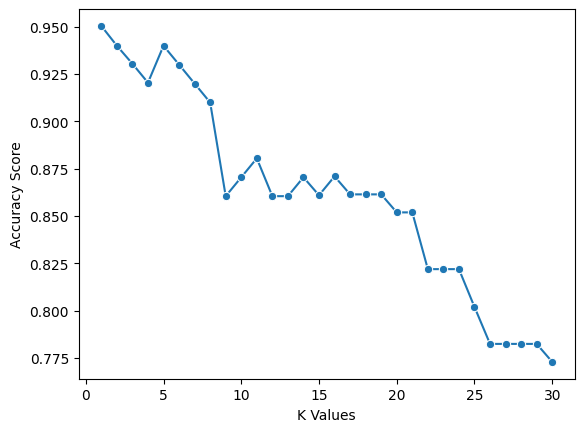

In [44]:
import  seaborn as sns
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [45]:
scores

[0.9504761904761905,
 0.9400000000000001,
 0.9304761904761906,
 0.9204761904761906,
 0.9400000000000001,
 0.93,
 0.9200000000000002,
 0.9099999999999999,
 0.8604761904761906,
 0.8704761904761906,
 0.8804761904761905,
 0.8604761904761904,
 0.8604761904761904,
 0.8704761904761904,
 0.8609523809523809,
 0.870952380952381,
 0.8614285714285714,
 0.8614285714285714,
 0.8614285714285714,
 0.8519047619047619,
 0.8519047619047619,
 0.8219047619047618,
 0.8219047619047618,
 0.8219047619047618,
 0.8019047619047619,
 0.7823809523809524,
 0.7823809523809524,
 0.7823809523809524,
 0.7823809523809524,
 0.7728571428571428]